# Insper - Modelagem e Simulação do Mundo Físico

## Atividade - Implementando um gráfico conclusivo em 3D ##

**0) Bibliotecas**

Como você já deve saber, os códigos compilados no Jupyter Notebook rodam um na sequência do outro. Se você declara uma variável no começo, pode utilizar essa mesma variável mais adiante.

Dado isso, vamos já importar todas as bibliotecas que serão utilizadas nessa atividade, assim não precisamos ficar importando elas novamente. Para tal, basta rodar o código abaixo antes de ir para o próximo item.

In [1]:
# Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

**1) Caso 1 (1ª iteração)**

Em aula, encontramos as equações diferenciais que representam um modelo de dois tanques:

<img src="modelo1.png" width=960> 

**1a) Modelo**

Implemente uma função denominada ```modelo``` que recebe uma lista com os estoques $x = [T_1 \quad T_2]$ e o instante de tempo $t$ e retorne uma lista com as taxas de variação dos estoques $\frac{dx}{dt} = [\frac{dT_1}{dt} \quad \frac{dT_1}{dt}]$. Mesmo que sua função não utilize a variável $t$, ela é obrigatória para o correto funcionamento da função ```odeint```.

In [2]:
# Implemente aqui seu código do item 1a

# Implementa equações diferenciais do modelo
def modelo(x, t, alpha, beta):
    S = x[0]
    I = x[1]
    dSdt = -alpha*S*I
    dIdt = alpha*S*I-beta*I
    dxdt = [dSdt, dIdt]
    return dxdt

**1b) Resolução numérica**

Agora que você implementou a função ```modelo```, calcule uma lista com uma lista de valores $[[T_1(0) \quad T_1(t_1) \quad \cdots \quad T_1(t_n)]$,$[T_2(0) \quad T_2(t_1) \quad \cdots \quad T_2(t_n)]]$ utilizando a função ```odeint```. Para isso, você vai precisar de:

- Uma lista com as condições iniciais $T_1(0) = 300$kg e $T_2(0) = 0$kg
- Uma lista de tempo $[0 \quad t_1 \quad \cdots \quad t_n]$ com $\Delta t$ bem pequeno (use $\Delta t=10^{-3}s$ em uma lista de tempo de $0$ a $200$s)

**1c) Gráfico**

Por fim, plote um gráfico de $T_1(t)$ e $T_2(t)$ por $t$ (utilize o mesmo par de eixos). Não se esqueça de que a estrutura de dados da solução do `odeint` é uma matriz (um "array"), e por isso precisamos usar um caractere de separação (um "split"). Isso se faz com o código `[:,0]`.

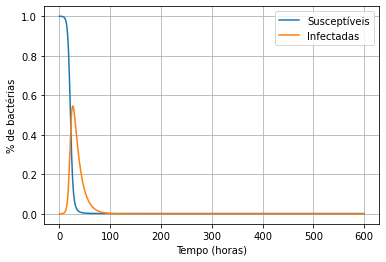

In [3]:
# Implemente aqui seu código do item 1c

# Lista de tempo
dt = 1
T = np.arange(0,600,dt)

x_0=[1, 1e-4]

# Função odeint
X = odeint(modelo,x_0,T, args=(0.5, 0.08))
S = X[:,0]
I = X[:,1]

# Plota resultados
plt.plot(T,S,label='Susceptíveis')
plt.plot(T,I,label='Infectadas')
plt.xlabel('Tempo (horas)')
plt.ylabel('% de bactérias')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
def QuandoMaximo(lista, lista_tempo):
    indice=0
    for i in range(len(lista)):
        if lista[i]>=max(lista)-1e-6:
            indice=i
            break
    return lista_tempo[indice]
    

In [5]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

%matplotlib qt5

fig = plt.figure()
ax = fig.gca(projection='3d')

lista_alpha=np.linspace(0.1,5,50)
lista_beta=np.linspace(0.1,5,50)

ListaMaximo = []

for alpha in lista_alpha:
    lista_linhas=[]
    for beta in lista_beta:          
        x = odeint(modelo, x_0, T, args=(alpha, beta))
        I = list(x[:,1])        
        #lista_linhas.append(T[I.index(max(I))])
        lista_linhas.append(max(I))
    ListaMaximo.append(lista_linhas)

        
X,Y=np.meshgrid(lista_alpha,lista_beta)  

Z=np.array(ListaMaximo)

print(len(X), len(Y), len(Z))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('d1')
ax.set_ylabel('d2')
ax.set_zlabel('Máximo de T2')

plt.show()

50 50 50


In [6]:
# Basic contour plot
fig, ax = plt.subplots()
ax.set_title("Pico de infectados")
levels = np.linspace(0,1,100)
CS = ax.contourf(X, Y, Z, levels, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
plt.show()

